In [ ]:
!pip install wikipedia

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from numpy import nan
import pickle
import requests 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import wikipedia
import nltk
nltk.download("all")
from nltk.corpus import stopwords


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [ ]:
stop = set(stopwords.words('english'))

pattern = re.compile(r"/wiki/([\w\d_]+)$")
page_pattern = re.compile(r"([\w\d\s])+")

G = nx.Graph()

def listToString(s): 
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))

def page_content(name):
    # Specify the title of the Wikipedia page
    wiki = wikipedia.page(name)

    # Extract the plain text content of the page, excluding images, tables, and other data.
    text = wiki.content
    text = text.replace('==', '')
    text = text.replace('\n', '')[:-12]
    text_words = nltk.word_tokenize(text)
    stop_text = [word for word in text_words if word not in stop]

    valid_token = []
    for word in stop_text:
        if len(word)>2:                
            res = re.match(page_pattern,word)
            if res:
                valid_token.append(word)
    return listToString(valid_token)

def feature_vector(name):
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform([page_content(name)])
    keywords = vectorizer.get_feature_names_out()
    keyword = keywords.tolist()
    return (keyword,X.toarray())


In [ ]:
# 2 lists to list out visited and unvisited nodes
open_list = ["Algebra", "Derivative", "Integral","Statistics", "Probability"]
closed_list = ["Main_Page"]

l = len(open_list)
G.add_node(open_list[0], embedding=feature_vector("Algebra"))
nodes = [open_list[0]]

Processing nodes by BFS on the closed node list.

In [ ]:
node = 0
while len(nodes) < 50000:
    
    print(f"Node {node} done!")
    node+=1
    
    ele = open_list.pop(0)
    closed_list.append(ele)

    r = requests.get(f"https://en.wikipedia.org/wiki/{ele}").text
    soup = BeautifulSoup(r, 'html.parser')
    all_anchor_tags = soup.find_all('a')
    links = [str(link.get("href")) for link in all_anchor_tags][:20]
    valid_links = []

    for link in links:
        result = pattern.search(link)
        if result and link not in closed_list:
            valid_links.append(result.group(1))

    # Popping out the first one and passing on to the next

    for all_links in valid_links:
        if all_links in nodes:
            G.add_edge(ele, all_links)
        else:
            nodes.append(all_links)
            try:
                temp = feature_vector(all_links)
                if len(temp[0])<100:
                    pass
                else:
                    fv = feature_vector(all_links)
            except:
                continue
            G.add_node(all_links, embedding=fv)
            G.add_edge(ele, all_links)
    open_list.extend(valid_links)

    if len(nodes)%100==0:
        nx.write_gpickle(G, "test3.gpickle")


Node 0 done!
Node 1 done!
Node 2 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 3 done!
Node 4 done!
Node 5 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6 done!
Node 7 done!
Node 8 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9 done!
Node 10 done!
Node 11 done!
Node 12 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 13 done!
Node 14 done!
Node 15 done!
Node 16 done!
Node 17 done!
Node 18 done!
Node 19 done!
Node 20 done!
Node 21 done!
Node 22 done!
Node 23 done!
Node 24 done!
Node 25 done!
Node 26 done!
Node 27 done!
Node 28 done!
Node 29 done!
Node 30 done!
Node 31 done!
Node 32 done!
Node 33 done!
Node 34 done!
Node 35 done!
Node 36 done!
Node 37 done!
Node 38 done!
Node 39 done!
Node 40 done!
Node 41 done!
Node 42 done!
Node 43 done!
Node 44 done!
Node 45 done!
Node 46 done!
Node 47 done!
Node 48 done!
Node 49 done!
Node 50 done!
Node 51 done!
Node 52 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 53 done!
Node 54 done!
Node 55 done!
Node 56 done!
Node 57 done!
Node 58 done!
Node 59 done!
Node 60 done!
Node 61 done!
Node 62 done!
Node 63 done!
Node 64 done!
Node 65 done!
Node 66 done!
Node 67 done!
Node 68 done!
Node 69 done!
Node 70 done!
Node 71 done!
Node 72 done!
Node 73 done!
Node 74 done!
Node 75 done!
Node 76 done!
Node 77 done!
Node 78 done!
Node 79 done!
Node 80 done!
Node 81 done!
Node 82 done!
Node 83 done!
Node 84 done!
Node 85 done!
Node 86 done!
Node 87 done!
Node 88 done!
Node 89 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 90 done!
Node 91 done!
Node 92 done!
Node 93 done!
Node 94 done!
Node 95 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 96 done!
Node 97 done!
Node 98 done!
Node 99 done!
Node 100 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 101 done!
Node 102 done!
Node 103 done!
Node 104 done!
Node 105 done!
Node 106 done!
Node 107 done!
Node 108 done!
Node 109 done!
Node 110 done!
Node 111 done!
Node 112 done!
Node 113 done!
Node 114 done!
Node 115 done!
Node 116 done!
Node 117 done!
Node 118 done!
Node 119 done!
Node 120 done!
Node 121 done!
Node 122 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 123 done!
Node 124 done!
Node 125 done!
Node 126 done!
Node 127 done!
Node 128 done!
Node 129 done!
Node 130 done!
Node 131 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 132 done!
Node 133 done!
Node 134 done!
Node 135 done!
Node 136 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 137 done!
Node 138 done!
Node 139 done!
Node 140 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 141 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 142 done!
Node 143 done!
Node 144 done!
Node 145 done!
Node 146 done!
Node 147 done!
Node 148 done!
Node 149 done!
Node 150 done!
Node 151 done!
Node 152 done!
Node 153 done!
Node 154 done!
Node 155 done!
Node 156 done!
Node 157 done!
Node 158 done!
Node 159 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 160 done!
Node 161 done!
Node 162 done!
Node 163 done!
Node 164 done!
Node 165 done!
Node 166 done!
Node 167 done!
Node 168 done!
Node 169 done!
Node 170 done!
Node 171 done!
Node 172 done!
Node 173 done!
Node 174 done!
Node 175 done!
Node 176 done!
Node 177 done!
Node 178 done!
Node 179 done!
Node 180 done!
Node 181 done!
Node 182 done!
Node 183 done!
Node 184 done!
Node 185 done!
Node 186 done!
Node 187 done!
Node 188 done!
Node 189 done!
Node 190 done!
Node 191 done!
Node 192 done!
Node 193 done!
Node 194 done!
Node 195 done!
Node 196 done!
Node 197 done!
Node 198 done!
Node 199 done!
Node 200 done!
Node 201 done!
Node 202 done!
Node 203 done!
Node 204 done!
Node 205 done!
Node 206 done!
Node 207 done!
Node 208 done!
Node 209 done!
Node 210 done!
Node 211 done!
Node 212 done!
Node 213 done!
Node 214 done!
Node 215 done!
Node 216 done!
Node 217 done!
Node 218 done!
Node 219 done!
Node 220 done!
Node 221 done!
Node 222 done!
Node 223 done!
Node 224 done!
Node 225 done!
Node 226 d

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 389 done!
Node 390 done!
Node 391 done!
Node 392 done!
Node 393 done!
Node 394 done!
Node 395 done!
Node 396 done!
Node 397 done!
Node 398 done!
Node 399 done!
Node 400 done!
Node 401 done!
Node 402 done!
Node 403 done!
Node 404 done!
Node 405 done!
Node 406 done!
Node 407 done!
Node 408 done!
Node 409 done!
Node 410 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 411 done!
Node 412 done!
Node 413 done!
Node 414 done!
Node 415 done!
Node 416 done!
Node 417 done!
Node 418 done!
Node 419 done!
Node 420 done!
Node 421 done!
Node 422 done!
Node 423 done!
Node 424 done!
Node 425 done!
Node 426 done!
Node 427 done!
Node 428 done!
Node 429 done!
Node 430 done!
Node 431 done!
Node 432 done!
Node 433 done!
Node 434 done!
Node 435 done!
Node 436 done!
Node 437 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 438 done!
Node 439 done!
Node 440 done!
Node 441 done!
Node 442 done!
Node 443 done!
Node 444 done!
Node 445 done!
Node 446 done!
Node 447 done!
Node 448 done!
Node 449 done!
Node 450 done!
Node 451 done!
Node 452 done!
Node 453 done!
Node 454 done!
Node 455 done!
Node 456 done!
Node 457 done!
Node 458 done!
Node 459 done!
Node 460 done!
Node 461 done!
Node 462 done!
Node 463 done!
Node 464 done!
Node 465 done!
Node 466 done!
Node 467 done!
Node 468 done!
Node 469 done!
Node 470 done!
Node 471 done!
Node 472 done!
Node 473 done!
Node 474 done!
Node 475 done!
Node 476 done!
Node 477 done!
Node 478 done!
Node 479 done!
Node 480 done!
Node 481 done!
Node 482 done!
Node 483 done!
Node 484 done!
Node 485 done!
Node 486 done!
Node 487 done!
Node 488 done!
Node 489 done!
Node 490 done!
Node 491 done!
Node 492 done!
Node 493 done!
Node 494 done!
Node 495 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 496 done!
Node 497 done!
Node 498 done!
Node 499 done!
Node 500 done!
Node 501 done!
Node 502 done!
Node 503 done!
Node 504 done!
Node 505 done!
Node 506 done!
Node 507 done!
Node 508 done!
Node 509 done!
Node 510 done!
Node 511 done!
Node 512 done!
Node 513 done!
Node 514 done!
Node 515 done!
Node 516 done!
Node 517 done!
Node 518 done!
Node 519 done!
Node 520 done!
Node 521 done!
Node 522 done!
Node 523 done!
Node 524 done!
Node 525 done!
Node 526 done!
Node 527 done!
Node 528 done!
Node 529 done!
Node 530 done!
Node 531 done!
Node 532 done!
Node 533 done!
Node 534 done!
Node 535 done!
Node 536 done!
Node 537 done!
Node 538 done!
Node 539 done!
Node 540 done!
Node 541 done!
Node 542 done!
Node 543 done!
Node 544 done!
Node 545 done!
Node 546 done!
Node 547 done!
Node 548 done!
Node 549 done!
Node 550 done!
Node 551 done!
Node 552 done!
Node 553 done!
Node 554 done!
Node 555 done!
Node 556 done!
Node 557 done!
Node 558 done!
Node 559 done!
Node 560 done!
Node 561 done!
Node 562 d

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 588 done!
Node 589 done!
Node 590 done!
Node 591 done!
Node 592 done!
Node 593 done!
Node 594 done!
Node 595 done!
Node 596 done!
Node 597 done!
Node 598 done!
Node 599 done!
Node 600 done!
Node 601 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 602 done!
Node 603 done!
Node 604 done!
Node 605 done!
Node 606 done!
Node 607 done!
Node 608 done!
Node 609 done!
Node 610 done!
Node 611 done!
Node 612 done!
Node 613 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 614 done!
Node 615 done!
Node 616 done!
Node 617 done!
Node 618 done!
Node 619 done!
Node 620 done!
Node 621 done!
Node 622 done!
Node 623 done!
Node 624 done!
Node 625 done!
Node 626 done!
Node 627 done!
Node 628 done!
Node 629 done!
Node 630 done!
Node 631 done!
Node 632 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 633 done!
Node 634 done!
Node 635 done!
Node 636 done!
Node 637 done!
Node 638 done!
Node 639 done!
Node 640 done!
Node 641 done!
Node 642 done!
Node 643 done!
Node 644 done!
Node 645 done!
Node 646 done!
Node 647 done!
Node 648 done!
Node 649 done!
Node 650 done!
Node 651 done!
Node 652 done!
Node 653 done!
Node 654 done!
Node 655 done!
Node 656 done!
Node 657 done!
Node 658 done!
Node 659 done!
Node 660 done!
Node 661 done!
Node 662 done!
Node 663 done!
Node 664 done!
Node 665 done!
Node 666 done!
Node 667 done!
Node 668 done!
Node 669 done!
Node 670 done!
Node 671 done!
Node 672 done!
Node 673 done!
Node 674 done!
Node 675 done!
Node 676 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 677 done!
Node 678 done!
Node 679 done!
Node 680 done!
Node 681 done!
Node 682 done!
Node 683 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 684 done!
Node 685 done!
Node 686 done!
Node 687 done!
Node 688 done!
Node 689 done!
Node 690 done!
Node 691 done!
Node 692 done!
Node 693 done!
Node 694 done!
Node 695 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 696 done!
Node 697 done!
Node 698 done!
Node 699 done!
Node 700 done!
Node 701 done!
Node 702 done!
Node 703 done!
Node 704 done!
Node 705 done!
Node 706 done!
Node 707 done!
Node 708 done!
Node 709 done!
Node 710 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 711 done!
Node 712 done!
Node 713 done!
Node 714 done!
Node 715 done!
Node 716 done!
Node 717 done!
Node 718 done!
Node 719 done!
Node 720 done!
Node 721 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 722 done!
Node 723 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 724 done!
Node 725 done!
Node 726 done!
Node 727 done!
Node 728 done!
Node 729 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 730 done!
Node 731 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 732 done!
Node 733 done!
Node 734 done!
Node 735 done!
Node 736 done!
Node 737 done!
Node 738 done!
Node 739 done!
Node 740 done!
Node 741 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 742 done!
Node 743 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 744 done!
Node 745 done!
Node 746 done!
Node 747 done!
Node 748 done!
Node 749 done!
Node 750 done!
Node 751 done!
Node 752 done!
Node 753 done!
Node 754 done!
Node 755 done!
Node 756 done!
Node 757 done!
Node 758 done!
Node 759 done!
Node 760 done!
Node 761 done!
Node 762 done!
Node 763 done!
Node 764 done!
Node 765 done!
Node 766 done!
Node 767 done!
Node 768 done!
Node 769 done!
Node 770 done!
Node 771 done!
Node 772 done!
Node 773 done!
Node 774 done!
Node 775 done!
Node 776 done!
Node 777 done!
Node 778 done!
Node 779 done!
Node 780 done!
Node 781 done!
Node 782 done!
Node 783 done!
Node 784 done!
Node 785 done!
Node 786 done!
Node 787 done!
Node 788 done!
Node 789 done!
Node 790 done!
Node 791 done!
Node 792 done!
Node 793 done!
Node 794 done!
Node 795 done!
Node 796 done!
Node 797 done!
Node 798 done!
Node 799 done!
Node 800 done!
Node 801 done!
Node 802 done!
Node 803 done!
Node 804 done!
Node 805 done!
Node 806 done!
Node 807 done!
Node 808 done!
Node 809 done!
Node 810 d

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 853 done!
Node 854 done!
Node 855 done!
Node 856 done!
Node 857 done!
Node 858 done!
Node 859 done!
Node 860 done!
Node 861 done!
Node 862 done!
Node 863 done!
Node 864 done!
Node 865 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 866 done!
Node 867 done!
Node 868 done!
Node 869 done!
Node 870 done!
Node 871 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 872 done!
Node 873 done!
Node 874 done!
Node 875 done!
Node 876 done!
Node 877 done!
Node 878 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 879 done!
Node 880 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 881 done!
Node 882 done!
Node 883 done!
Node 884 done!
Node 885 done!
Node 886 done!
Node 887 done!
Node 888 done!
Node 889 done!
Node 890 done!
Node 891 done!
Node 892 done!
Node 893 done!
Node 894 done!
Node 895 done!
Node 896 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 897 done!
Node 898 done!
Node 899 done!
Node 900 done!
Node 901 done!
Node 902 done!
Node 903 done!
Node 904 done!
Node 905 done!
Node 906 done!
Node 907 done!
Node 908 done!
Node 909 done!
Node 910 done!
Node 911 done!
Node 912 done!
Node 913 done!
Node 914 done!
Node 915 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 916 done!
Node 917 done!
Node 918 done!
Node 919 done!
Node 920 done!
Node 921 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 922 done!
Node 923 done!
Node 924 done!
Node 925 done!
Node 926 done!
Node 927 done!
Node 928 done!
Node 929 done!
Node 930 done!
Node 931 done!
Node 932 done!
Node 933 done!
Node 934 done!
Node 935 done!
Node 936 done!
Node 937 done!
Node 938 done!
Node 939 done!
Node 940 done!
Node 941 done!
Node 942 done!
Node 943 done!
Node 944 done!
Node 945 done!
Node 946 done!
Node 947 done!
Node 948 done!
Node 949 done!
Node 950 done!
Node 951 done!
Node 952 done!
Node 953 done!
Node 954 done!
Node 955 done!
Node 956 done!
Node 957 done!
Node 958 done!
Node 959 done!
Node 960 done!
Node 961 done!
Node 962 done!
Node 963 done!
Node 964 done!
Node 965 done!
Node 966 done!
Node 967 done!
Node 968 done!
Node 969 done!
Node 970 done!
Node 971 done!
Node 972 done!
Node 974 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 975 done!
Node 976 done!
Node 977 done!
Node 978 done!
Node 979 done!
Node 980 done!
Node 981 done!
Node 982 done!
Node 983 done!
Node 984 done!
Node 985 done!
Node 986 done!
Node 987 done!
Node 988 done!
Node 989 done!
Node 990 done!
Node 991 done!
Node 992 done!
Node 993 done!
Node 994 done!
Node 995 done!
Node 996 done!
Node 997 done!
Node 998 done!
Node 999 done!
Node 1000 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1001 done!
Node 1002 done!
Node 1003 done!
Node 1004 done!
Node 1005 done!
Node 1006 done!
Node 1007 done!
Node 1008 done!
Node 1009 done!
Node 1010 done!
Node 1011 done!
Node 1012 done!
Node 1013 done!
Node 1014 done!
Node 1015 done!
Node 1016 done!
Node 1017 done!
Node 1018 done!
Node 1019 done!
Node 1020 done!
Node 1021 done!
Node 1022 done!
Node 1023 done!
Node 1024 done!
Node 1025 done!
Node 1026 done!
Node 1027 done!
Node 1028 done!
Node 1029 done!
Node 1030 done!
Node 1031 done!
Node 1032 done!
Node 1033 done!
Node 1034 done!
Node 1035 done!
Node 1036 done!
Node 1037 done!
Node 1038 done!
Node 1039 done!
Node 1040 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1041 done!
Node 1042 done!
Node 1043 done!
Node 1044 done!
Node 1045 done!
Node 1046 done!
Node 1047 done!
Node 1048 done!
Node 1049 done!
Node 1050 done!
Node 1051 done!
Node 1052 done!
Node 1053 done!
Node 1054 done!
Node 1055 done!
Node 1056 done!
Node 1057 done!
Node 1058 done!
Node 1059 done!
Node 1060 done!
Node 1061 done!
Node 1062 done!
Node 1063 done!
Node 1064 done!
Node 1065 done!
Node 1066 done!
Node 1067 done!
Node 1068 done!
Node 1069 done!
Node 1070 done!
Node 1071 done!
Node 1072 done!
Node 1073 done!
Node 1074 done!
Node 1075 done!
Node 1076 done!
Node 1077 done!
Node 1078 done!
Node 1079 done!
Node 1080 done!
Node 1081 done!
Node 1082 done!
Node 1083 done!
Node 1084 done!
Node 1085 done!
Node 1086 done!
Node 1087 done!
Node 1088 done!
Node 1089 done!
Node 1090 done!
Node 1091 done!
Node 1092 done!
Node 1093 done!
Node 1094 done!
Node 1095 done!
Node 1096 done!
Node 1097 done!
Node 1098 done!
Node 1099 done!
Node 1100 done!
Node 1101 done!
Node 1102 done!
Node 110

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1177 done!
Node 1178 done!
Node 1179 done!
Node 1180 done!
Node 1181 done!
Node 1182 done!
Node 1183 done!
Node 1184 done!
Node 1185 done!
Node 1186 done!
Node 1187 done!
Node 1188 done!
Node 1189 done!
Node 1190 done!
Node 1191 done!
Node 1192 done!
Node 1193 done!
Node 1194 done!
Node 1195 done!
Node 1196 done!
Node 1197 done!
Node 1198 done!
Node 1199 done!
Node 1200 done!
Node 1201 done!
Node 1202 done!
Node 1203 done!
Node 1204 done!
Node 1205 done!
Node 1206 done!
Node 1207 done!
Node 1208 done!
Node 1209 done!
Node 1210 done!
Node 1211 done!
Node 1212 done!
Node 1213 done!
Node 1214 done!
Node 1215 done!
Node 1216 done!
Node 1217 done!
Node 1218 done!
Node 1219 done!
Node 1220 done!
Node 1221 done!
Node 1222 done!
Node 1223 done!
Node 1224 done!
Node 1225 done!
Node 1226 done!
Node 1227 done!
Node 1228 done!
Node 1229 done!
Node 1230 done!
Node 1231 done!
Node 1232 done!
Node 1233 done!
Node 1234 done!
Node 1235 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1236 done!
Node 1237 done!
Node 1238 done!
Node 1239 done!
Node 1240 done!
Node 1241 done!
Node 1242 done!
Node 1243 done!
Node 1244 done!
Node 1245 done!
Node 1246 done!
Node 1247 done!
Node 1248 done!
Node 1249 done!
Node 1250 done!
Node 1251 done!
Node 1252 done!
Node 1253 done!
Node 1254 done!
Node 1255 done!
Node 1256 done!
Node 1257 done!
Node 1258 done!
Node 1259 done!
Node 1260 done!
Node 1261 done!
Node 1262 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1263 done!
Node 1264 done!
Node 1265 done!
Node 1266 done!
Node 1267 done!
Node 1268 done!
Node 1269 done!
Node 1270 done!
Node 1271 done!
Node 1272 done!
Node 1273 done!
Node 1274 done!
Node 1275 done!
Node 1276 done!
Node 1277 done!
Node 1278 done!
Node 1279 done!
Node 1280 done!
Node 1281 done!
Node 1282 done!
Node 1283 done!
Node 1284 done!
Node 1285 done!
Node 1286 done!
Node 1287 done!
Node 1288 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1289 done!
Node 1290 done!
Node 1291 done!
Node 1292 done!
Node 1293 done!
Node 1294 done!
Node 1295 done!
Node 1296 done!
Node 1297 done!
Node 1298 done!
Node 1299 done!
Node 1300 done!
Node 1301 done!
Node 1302 done!
Node 1303 done!
Node 1304 done!
Node 1305 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1306 done!
Node 1307 done!
Node 1308 done!
Node 1309 done!
Node 1310 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1311 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1312 done!
Node 1313 done!
Node 1314 done!
Node 1315 done!
Node 1316 done!
Node 1317 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1318 done!
Node 1319 done!
Node 1320 done!
Node 1321 done!
Node 1322 done!
Node 1323 done!
Node 1324 done!
Node 1325 done!
Node 1326 done!
Node 1327 done!
Node 1328 done!
Node 1329 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1330 done!
Node 1331 done!
Node 1332 done!
Node 1333 done!
Node 1334 done!
Node 1335 done!
Node 1336 done!
Node 1337 done!
Node 1338 done!
Node 1339 done!
Node 1340 done!
Node 1341 done!
Node 1342 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1343 done!
Node 1344 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1345 done!
Node 1346 done!
Node 1347 done!
Node 1348 done!
Node 1349 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1350 done!
Node 1351 done!
Node 1352 done!
Node 1353 done!
Node 1354 done!
Node 1355 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1356 done!
Node 1357 done!
Node 1358 done!
Node 1359 done!
Node 1360 done!
Node 1361 done!
Node 1362 done!
Node 1363 done!
Node 1364 done!
Node 1365 done!
Node 1366 done!
Node 1367 done!
Node 1368 done!
Node 1369 done!
Node 1370 done!
Node 1371 done!
Node 1372 done!
Node 1373 done!
Node 1374 done!
Node 1375 done!
Node 1376 done!
Node 1377 done!
Node 1378 done!
Node 1379 done!
Node 1380 done!
Node 1381 done!
Node 1382 done!
Node 1383 done!
Node 1384 done!
Node 1385 done!
Node 1386 done!
Node 1387 done!
Node 1388 done!
Node 1389 done!
Node 1390 done!
Node 1391 done!
Node 1392 done!
Node 1393 done!
Node 1394 done!
Node 1395 done!
Node 1396 done!
Node 1397 done!
Node 1398 done!
Node 1399 done!
Node 1400 done!
Node 1401 done!
Node 1402 done!
Node 1403 done!
Node 1404 done!
Node 1405 done!
Node 1406 done!
Node 1407 done!
Node 1408 done!
Node 1409 done!
Node 1410 done!
Node 1411 done!
Node 1412 done!
Node 1413 done!
Node 1414 done!
Node 1415 done!
Node 1416 done!
Node 1417 done!
Node 141

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1516 done!
Node 1517 done!
Node 1518 done!
Node 1519 done!
Node 1520 done!
Node 1521 done!
Node 1522 done!
Node 1523 done!
Node 1524 done!
Node 1525 done!
Node 1526 done!
Node 1527 done!
Node 1528 done!
Node 1529 done!
Node 1530 done!
Node 1531 done!
Node 1532 done!
Node 1533 done!
Node 1534 done!
Node 1535 done!
Node 1536 done!
Node 1537 done!
Node 1538 done!
Node 1539 done!
Node 1540 done!
Node 1541 done!
Node 1542 done!
Node 1543 done!
Node 1544 done!
Node 1545 done!
Node 1546 done!
Node 1547 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1548 done!
Node 1549 done!
Node 1550 done!
Node 1551 done!
Node 1552 done!
Node 1553 done!
Node 1554 done!
Node 1555 done!
Node 1556 done!
Node 1557 done!
Node 1558 done!
Node 1559 done!
Node 1560 done!
Node 1561 done!
Node 1562 done!
Node 1563 done!
Node 1564 done!
Node 1565 done!
Node 1566 done!
Node 1567 done!
Node 1568 done!
Node 1569 done!
Node 1570 done!
Node 1571 done!
Node 1572 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1573 done!
Node 1574 done!
Node 1575 done!
Node 1576 done!
Node 1577 done!
Node 1578 done!
Node 1579 done!
Node 1580 done!
Node 1581 done!
Node 1582 done!
Node 1583 done!
Node 1584 done!
Node 1585 done!
Node 1586 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 1587 done!
Node 1588 done!
Node 1589 done!
Node 1590 done!
Node 1591 done!
Node 1592 done!
Node 1593 done!
Node 1594 done!
Node 1595 done!
Node 1596 done!
Node 1597 done!
Node 1598 done!
Node 1599 done!
Node 1600 done!
Node 1601 done!
Node 1602 done!
Node 1603 done!
Node 1604 done!
Node 1605 done!
Node 1606 done!
Node 1607 done!
Node 1608 done!
Node 1609 done!
Node 1610 done!
Node 1611 done!
Node 1612 done!
Node 1613 done!
Node 1614 done!
Node 1615 done!
Node 1616 done!
Node 1617 done!
Node 1618 done!
Node 1619 done!
Node 1620 done!
Node 1621 done!
Node 1622 done!
Node 1623 done!
Node 1624 done!
Node 1625 done!
Node 1626 done!
Node 1627 done!
Node 1628 done!
Node 1629 done!
Node 1630 done!
Node 1631 done!
Node 1632 done!
Node 1633 done!
Node 1634 done!
Node 1635 done!
Node 1636 done!
Node 1637 done!
Node 1638 done!
Node 1639 done!
Node 1640 done!
Node 1641 done!
Node 1642 done!
Node 1643 done!
Node 1644 done!
Node 1645 done!
Node 1646 done!
Node 1647 done!
Node 1648 done!
Node 164

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 3798 done!
Node 3799 done!
Node 3800 done!
Node 3801 done!
Node 3802 done!
Node 3803 done!
Node 3804 done!
Node 3805 done!
Node 3806 done!
Node 3807 done!
Node 3808 done!
Node 3809 done!
Node 3810 done!
Node 3811 done!
Node 3812 done!
Node 3813 done!
Node 3814 done!
Node 3815 done!
Node 3816 done!
Node 3817 done!
Node 3818 done!
Node 3819 done!
Node 3820 done!
Node 3821 done!
Node 3822 done!
Node 3823 done!
Node 3824 done!
Node 3825 done!
Node 3826 done!
Node 3827 done!
Node 3828 done!
Node 3829 done!
Node 3830 done!
Node 3831 done!
Node 3832 done!
Node 3833 done!
Node 3834 done!
Node 3835 done!
Node 3836 done!
Node 3837 done!
Node 3838 done!
Node 3839 done!
Node 3840 done!
Node 3841 done!
Node 3842 done!
Node 3843 done!
Node 3844 done!
Node 3845 done!
Node 3846 done!
Node 3847 done!
Node 3848 done!
Node 3849 done!
Node 3850 done!
Node 3851 done!
Node 3852 done!
Node 3853 done!
Node 3854 done!
Node 3855 done!
Node 3856 done!
Node 3857 done!
Node 3858 done!
Node 3859 done!
Node 386

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 3940 done!
Node 3941 done!
Node 3942 done!
Node 3943 done!
Node 3944 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 3945 done!
Node 3946 done!
Node 3947 done!
Node 3948 done!
Node 3949 done!
Node 3950 done!
Node 3951 done!
Node 3952 done!
Node 3953 done!
Node 3954 done!
Node 3955 done!
Node 3956 done!
Node 3957 done!
Node 3958 done!
Node 3959 done!
Node 3960 done!
Node 3961 done!
Node 3962 done!
Node 3963 done!
Node 3964 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 3965 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 3966 done!
Node 3967 done!
Node 3968 done!
Node 3969 done!
Node 3970 done!
Node 3971 done!
Node 3972 done!
Node 3973 done!
Node 3974 done!
Node 3975 done!
Node 3976 done!
Node 3977 done!
Node 3978 done!
Node 3979 done!
Node 3980 done!
Node 3981 done!
Node 3982 done!
Node 3983 done!
Node 3984 done!
Node 3985 done!
Node 3986 done!
Node 3987 done!
Node 3988 done!
Node 3989 done!
Node 3990 done!
Node 3991 done!
Node 3992 done!
Node 3993 done!
Node 3994 done!
Node 3995 done!
Node 3996 done!
Node 3997 done!
Node 3998 done!
Node 3999 done!
Node 4000 done!
Node 4001 done!
Node 4002 done!
Node 4003 done!
Node 4004 done!
Node 4005 done!
Node 4006 done!
Node 4007 done!
Node 4008 done!
Node 4009 done!
Node 4010 done!
Node 4011 done!
Node 4012 done!
Node 4013 done!
Node 4014 done!
Node 4015 done!
Node 4016 done!
Node 4017 done!
Node 4018 done!
Node 4019 done!
Node 4020 done!
Node 4021 done!
Node 4022 done!
Node 4023 done!
Node 4024 done!
Node 4025 done!
Node 4026 done!
Node 4027 done!
Node 402

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 4194 done!
Node 4195 done!
Node 4196 done!
Node 4197 done!
Node 4198 done!
Node 4199 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 4200 done!
Node 4201 done!
Node 4202 done!
Node 4203 done!
Node 4204 done!
Node 4205 done!
Node 4206 done!
Node 4207 done!
Node 4208 done!
Node 4209 done!
Node 4210 done!
Node 4211 done!
Node 4212 done!
Node 4213 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 4214 done!
Node 4215 done!
Node 4216 done!
Node 4217 done!
Node 4218 done!
Node 4219 done!
Node 4220 done!
Node 4221 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 4222 done!
Node 4223 done!
Node 4224 done!
Node 4225 done!
Node 4226 done!
Node 4227 done!
Node 4228 done!
Node 4229 done!
Node 4230 done!
Node 4231 done!
Node 4232 done!
Node 4233 done!
Node 4234 done!
Node 4235 done!
Node 4236 done!
Node 4237 done!
Node 4238 done!
Node 4239 done!
Node 4240 done!
Node 4241 done!
Node 4242 done!
Node 4243 done!
Node 4244 done!
Node 4245 done!
Node 4246 done!
Node 4247 done!
Node 4248 done!
Node 4249 done!
Node 4250 done!
Node 4251 done!
Node 4252 done!
Node 4253 done!
Node 4254 done!
Node 4255 done!
Node 4256 done!
Node 4257 done!
Node 4258 done!
Node 4259 done!
Node 4260 done!
Node 4261 done!
Node 4262 done!
Node 4263 done!
Node 4264 done!
Node 4265 done!
Node 4266 done!
Node 4267 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 4268 done!
Node 4269 done!
Node 4270 done!
Node 4271 done!
Node 4272 done!
Node 4273 done!
Node 4274 done!
Node 4275 done!
Node 4276 done!
Node 4277 done!
Node 4278 done!
Node 4279 done!
Node 4280 done!
Node 4281 done!
Node 4282 done!
Node 4283 done!
Node 4284 done!
Node 4285 done!
Node 4286 done!
Node 4287 done!
Node 4288 done!
Node 4289 done!
Node 4290 done!
Node 4291 done!
Node 4292 done!
Node 4293 done!
Node 4294 done!
Node 4295 done!
Node 4296 done!
Node 4297 done!
Node 4298 done!
Node 4299 done!
Node 4300 done!
Node 4301 done!
Node 4302 done!
Node 4303 done!
Node 4304 done!
Node 4305 done!
Node 4306 done!
Node 4307 done!
Node 4308 done!
Node 4309 done!
Node 4310 done!
Node 4311 done!
Node 4312 done!
Node 4313 done!
Node 4314 done!
Node 4315 done!
Node 4316 done!
Node 4317 done!
Node 4318 done!
Node 4319 done!
Node 4320 done!
Node 4321 done!
Node 4322 done!
Node 4323 done!
Node 4324 done!
Node 4325 done!
Node 4326 done!
Node 4327 done!
Node 4328 done!
Node 4329 done!
Node 433

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 5637 done!
Node 5638 done!
Node 5639 done!
Node 5640 done!
Node 5641 done!
Node 5642 done!
Node 5643 done!
Node 5644 done!
Node 5645 done!
Node 5646 done!
Node 5647 done!
Node 5648 done!
Node 5649 done!
Node 5650 done!
Node 5651 done!
Node 5652 done!
Node 5653 done!
Node 5654 done!
Node 5655 done!
Node 5656 done!
Node 5657 done!
Node 5658 done!
Node 5659 done!
Node 5660 done!
Node 5661 done!
Node 5662 done!
Node 5663 done!
Node 5664 done!
Node 5665 done!
Node 5666 done!
Node 5667 done!
Node 5668 done!
Node 5669 done!
Node 5670 done!
Node 5671 done!
Node 5672 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 5673 done!
Node 5674 done!
Node 5675 done!
Node 5676 done!
Node 5677 done!
Node 5678 done!
Node 5679 done!
Node 5680 done!
Node 5681 done!
Node 5682 done!
Node 5683 done!
Node 5684 done!
Node 5685 done!
Node 5686 done!
Node 5687 done!
Node 5688 done!
Node 5689 done!
Node 5690 done!
Node 5691 done!
Node 5692 done!
Node 5693 done!
Node 5694 done!
Node 5695 done!
Node 5696 done!
Node 5697 done!
Node 5698 done!
Node 5699 done!
Node 5700 done!
Node 5701 done!
Node 5702 done!
Node 5703 done!
Node 5704 done!
Node 5705 done!
Node 5706 done!
Node 5707 done!
Node 5708 done!
Node 5709 done!
Node 5710 done!
Node 5711 done!
Node 5712 done!
Node 5713 done!
Node 5714 done!
Node 5715 done!
Node 5716 done!
Node 5717 done!
Node 5718 done!
Node 5719 done!
Node 5720 done!
Node 5721 done!
Node 5722 done!
Node 5723 done!
Node 5724 done!
Node 5725 done!
Node 5726 done!
Node 5727 done!
Node 5728 done!
Node 5729 done!
Node 5730 done!
Node 5731 done!
Node 5732 done!
Node 5733 done!
Node 5734 done!
Node 573

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 5739 done!
Node 5740 done!
Node 5741 done!
Node 5742 done!
Node 5743 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 5744 done!
Node 5745 done!
Node 5746 done!
Node 5747 done!
Node 5748 done!
Node 5749 done!
Node 5750 done!
Node 5751 done!
Node 5752 done!
Node 5753 done!
Node 5754 done!
Node 5755 done!
Node 5756 done!
Node 5757 done!
Node 5758 done!
Node 5759 done!
Node 5760 done!
Node 5761 done!
Node 5762 done!
Node 5763 done!
Node 5764 done!
Node 5765 done!
Node 5766 done!
Node 5767 done!
Node 5768 done!
Node 5769 done!
Node 5770 done!
Node 5771 done!
Node 5772 done!
Node 5773 done!
Node 5774 done!
Node 5775 done!
Node 5776 done!
Node 5777 done!
Node 5778 done!
Node 5779 done!
Node 5780 done!
Node 5781 done!
Node 5782 done!
Node 5783 done!
Node 5784 done!
Node 5785 done!
Node 5786 done!
Node 5787 done!
Node 5788 done!
Node 5789 done!
Node 5790 done!
Node 5791 done!
Node 5792 done!
Node 5793 done!
Node 5794 done!
Node 5795 done!
Node 5796 done!
Node 5797 done!
Node 5798 done!
Node 5799 done!
Node 5800 done!
Node 5801 done!
Node 5802 done!
Node 5803 done!
Node 5804 done!
Node 5805 done!
Node 580

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 5839 done!
Node 5840 done!
Node 5841 done!
Node 5842 done!
Node 5843 done!
Node 5844 done!
Node 5845 done!
Node 5846 done!
Node 5847 done!
Node 5848 done!
Node 5849 done!
Node 5850 done!
Node 5851 done!
Node 5852 done!
Node 5853 done!
Node 5854 done!
Node 5855 done!
Node 5856 done!
Node 5857 done!
Node 5858 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 5859 done!
Node 5860 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 5861 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 5862 done!
Node 5863 done!
Node 5864 done!
Node 5865 done!
Node 5866 done!
Node 5867 done!
Node 5868 done!
Node 5869 done!
Node 5870 done!
Node 5871 done!
Node 5872 done!
Node 5873 done!
Node 5874 done!
Node 5875 done!
Node 5876 done!
Node 5877 done!
Node 5878 done!
Node 5879 done!
Node 5880 done!
Node 5881 done!
Node 5882 done!
Node 5883 done!
Node 5884 done!
Node 5885 done!
Node 5886 done!
Node 5887 done!
Node 5888 done!
Node 5889 done!
Node 5890 done!
Node 5891 done!
Node 5892 done!
Node 5893 done!
Node 5894 done!
Node 5895 done!
Node 5896 done!
Node 5897 done!
Node 5898 done!
Node 5899 done!
Node 5900 done!
Node 5901 done!
Node 5902 done!
Node 5903 done!
Node 5904 done!
Node 5905 done!
Node 5906 done!
Node 5907 done!
Node 5908 done!
Node 5909 done!
Node 5910 done!
Node 5911 done!
Node 5912 done!
Node 5913 done!
Node 5914 done!
Node 5915 done!
Node 5916 done!
Node 5917 done!
Node 5918 done!
Node 5919 done!
Node 5920 done!
Node 5921 done!
Node 5922 done!
Node 5923 done!
Node 592

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6194 done!
Node 6195 done!
Node 6196 done!
Node 6197 done!
Node 6198 done!
Node 6199 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6200 done!
Node 6201 done!
Node 6202 done!
Node 6203 done!
Node 6204 done!
Node 6205 done!
Node 6206 done!
Node 6207 done!
Node 6208 done!
Node 6209 done!
Node 6210 done!
Node 6211 done!
Node 6212 done!
Node 6213 done!
Node 6214 done!
Node 6215 done!
Node 6216 done!
Node 6217 done!
Node 6218 done!
Node 6219 done!
Node 6220 done!
Node 6221 done!
Node 6222 done!
Node 6223 done!
Node 6224 done!
Node 6225 done!
Node 6226 done!
Node 6227 done!
Node 6228 done!
Node 6229 done!
Node 6230 done!
Node 6231 done!
Node 6232 done!
Node 6233 done!
Node 6234 done!
Node 6235 done!
Node 6236 done!
Node 6237 done!
Node 6238 done!
Node 6239 done!
Node 6240 done!
Node 6241 done!
Node 6242 done!
Node 6243 done!
Node 6244 done!
Node 6245 done!
Node 6246 done!
Node 6247 done!
Node 6248 done!
Node 6249 done!
Node 6250 done!
Node 6251 done!
Node 6252 done!
Node 6253 done!
Node 6254 done!
Node 6255 done!
Node 6256 done!
Node 6257 done!
Node 6258 done!
Node 6259 done!
Node 6260 done!
Node 6261 done!
Node 626

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6352 done!
Node 6353 done!
Node 6354 done!
Node 6355 done!
Node 6356 done!
Node 6357 done!
Node 6358 done!
Node 6359 done!
Node 6360 done!
Node 6361 done!
Node 6362 done!
Node 6363 done!
Node 6364 done!
Node 6365 done!
Node 6366 done!
Node 6367 done!
Node 6368 done!
Node 6369 done!
Node 6370 done!
Node 6371 done!
Node 6372 done!
Node 6373 done!
Node 6374 done!
Node 6375 done!
Node 6376 done!
Node 6377 done!
Node 6378 done!
Node 6379 done!
Node 6380 done!
Node 6381 done!
Node 6382 done!
Node 6383 done!
Node 6384 done!
Node 6385 done!
Node 6386 done!
Node 6387 done!
Node 6388 done!
Node 6389 done!
Node 6390 done!
Node 6391 done!
Node 6392 done!
Node 6393 done!
Node 6394 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6395 done!
Node 6396 done!
Node 6397 done!
Node 6398 done!
Node 6399 done!
Node 6400 done!
Node 6401 done!
Node 6402 done!
Node 6403 done!
Node 6404 done!
Node 6405 done!
Node 6406 done!
Node 6407 done!
Node 6408 done!
Node 6409 done!
Node 6410 done!
Node 6411 done!
Node 6412 done!
Node 6413 done!
Node 6414 done!
Node 6415 done!
Node 6416 done!
Node 6417 done!
Node 6418 done!
Node 6419 done!
Node 6420 done!
Node 6421 done!
Node 6422 done!
Node 6423 done!
Node 6424 done!
Node 6425 done!
Node 6426 done!
Node 6427 done!
Node 6428 done!
Node 6429 done!
Node 6430 done!
Node 6431 done!
Node 6432 done!
Node 6433 done!
Node 6434 done!
Node 6435 done!
Node 6436 done!
Node 6437 done!
Node 6438 done!
Node 6439 done!
Node 6440 done!
Node 6441 done!
Node 6442 done!
Node 6443 done!
Node 6444 done!
Node 6445 done!
Node 6446 done!
Node 6447 done!
Node 6448 done!
Node 6449 done!
Node 6450 done!
Node 6451 done!
Node 6452 done!
Node 6453 done!
Node 6454 done!
Node 6455 done!
Node 6456 done!
Node 645

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 6459 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6460 done!
Node 6461 done!
Node 6462 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6463 done!
Node 6464 done!
Node 6465 done!
Node 6466 done!
Node 6467 done!
Node 6468 done!
Node 6469 done!
Node 6470 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6471 done!
Node 6472 done!
Node 6473 done!
Node 6474 done!
Node 6475 done!
Node 6476 done!
Node 6477 done!
Node 6478 done!
Node 6479 done!
Node 6480 done!
Node 6481 done!
Node 6482 done!
Node 6483 done!
Node 6484 done!
Node 6485 done!
Node 6486 done!
Node 6487 done!
Node 6488 done!
Node 6489 done!
Node 6490 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6491 done!
Node 6492 done!
Node 6493 done!
Node 6494 done!
Node 6495 done!
Node 6496 done!
Node 6497 done!
Node 6498 done!
Node 6499 done!
Node 6500 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6501 done!
Node 6502 done!
Node 6503 done!
Node 6504 done!
Node 6505 done!
Node 6506 done!
Node 6507 done!
Node 6508 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6509 done!
Node 6510 done!
Node 6511 done!
Node 6512 done!
Node 6513 done!
Node 6514 done!
Node 6515 done!
Node 6516 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6517 done!
Node 6518 done!
Node 6519 done!
Node 6520 done!
Node 6521 done!
Node 6522 done!
Node 6523 done!
Node 6524 done!
Node 6525 done!
Node 6526 done!
Node 6527 done!
Node 6528 done!
Node 6529 done!
Node 6530 done!
Node 6531 done!
Node 6532 done!
Node 6533 done!
Node 6534 done!
Node 6535 done!
Node 6536 done!
Node 6537 done!
Node 6538 done!
Node 6539 done!
Node 6540 done!
Node 6541 done!
Node 6542 done!
Node 6543 done!
Node 6544 done!
Node 6545 done!
Node 6546 done!
Node 6547 done!
Node 6548 done!
Node 6549 done!
Node 6550 done!
Node 6551 done!
Node 6552 done!
Node 6553 done!
Node 6554 done!
Node 6555 done!
Node 6556 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6557 done!
Node 6558 done!
Node 6559 done!
Node 6560 done!
Node 6561 done!
Node 6562 done!
Node 6563 done!
Node 6564 done!
Node 6565 done!
Node 6566 done!
Node 6567 done!
Node 6568 done!
Node 6569 done!
Node 6570 done!
Node 6571 done!
Node 6572 done!
Node 6573 done!
Node 6574 done!
Node 6575 done!
Node 6576 done!
Node 6577 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6578 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6579 done!
Node 6580 done!
Node 6581 done!
Node 6582 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6583 done!
Node 6584 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 6585 done!
Node 6586 done!
Node 6587 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6588 done!
Node 6589 done!
Node 6590 done!
Node 6591 done!
Node 6592 done!
Node 6593 done!
Node 6594 done!
Node 6595 done!
Node 6596 done!
Node 6597 done!
Node 6598 done!
Node 6599 done!
Node 6600 done!
Node 6601 done!
Node 6602 done!
Node 6603 done!
Node 6604 done!
Node 6605 done!
Node 6606 done!
Node 6607 done!
Node 6608 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6609 done!
Node 6610 done!
Node 6611 done!
Node 6612 done!
Node 6613 done!
Node 6614 done!
Node 6615 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6616 done!
Node 6617 done!
Node 6618 done!
Node 6619 done!
Node 6620 done!
Node 6621 done!
Node 6622 done!
Node 6623 done!
Node 6624 done!
Node 6625 done!
Node 6626 done!
Node 6627 done!
Node 6628 done!
Node 6629 done!
Node 6630 done!
Node 6631 done!
Node 6632 done!
Node 6633 done!
Node 6634 done!
Node 6635 done!
Node 6636 done!
Node 6637 done!
Node 6638 done!
Node 6639 done!
Node 6640 done!
Node 6641 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6642 done!
Node 6643 done!
Node 6644 done!
Node 6645 done!
Node 6646 done!
Node 6647 done!
Node 6648 done!
Node 6649 done!
Node 6650 done!
Node 6651 done!
Node 6652 done!
Node 6653 done!
Node 6654 done!
Node 6655 done!
Node 6656 done!
Node 6657 done!
Node 6658 done!
Node 6659 done!
Node 6660 done!
Node 6661 done!
Node 6662 done!
Node 6663 done!
Node 6664 done!
Node 6665 done!
Node 6666 done!
Node 6667 done!
Node 6668 done!
Node 6669 done!
Node 6670 done!
Node 6671 done!
Node 6672 done!
Node 6673 done!
Node 6674 done!
Node 6675 done!
Node 6676 done!
Node 6677 done!
Node 6678 done!
Node 6679 done!
Node 6680 done!
Node 6681 done!
Node 6682 done!
Node 6683 done!
Node 6684 done!
Node 6685 done!
Node 6686 done!
Node 6687 done!
Node 6688 done!
Node 6689 done!
Node 6690 done!
Node 6691 done!
Node 6692 done!
Node 6693 done!
Node 6694 done!
Node 6695 done!
Node 6696 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6697 done!
Node 6698 done!
Node 6699 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6700 done!
Node 6701 done!
Node 6702 done!
Node 6703 done!
Node 6704 done!
Node 6705 done!
Node 6706 done!
Node 6707 done!
Node 6708 done!
Node 6709 done!
Node 6710 done!
Node 6711 done!
Node 6712 done!
Node 6713 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 6714 done!
Node 6715 done!
Node 6716 done!
Node 6717 done!
Node 6718 done!
Node 6719 done!
Node 6720 done!
Node 6721 done!
Node 6722 done!
Node 6723 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 6724 done!
Node 6725 done!
Node 6726 done!
Node 6727 done!
Node 6728 done!
Node 6729 done!
Node 6730 done!
Node 6731 done!
Node 6732 done!
Node 6733 done!
Node 6734 done!
Node 6735 done!
Node 6736 done!
Node 6737 done!
Node 6738 done!
Node 6739 done!
Node 6740 done!
Node 6741 done!
Node 6742 done!
Node 6743 done!
Node 6744 done!
Node 6745 done!
Node 6746 done!
Node 6747 done!
Node 6748 done!
Node 6749 done!
Node 6750 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6751 done!
Node 6752 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6753 done!
Node 6754 done!
Node 6755 done!
Node 6756 done!
Node 6757 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6758 done!
Node 6759 done!
Node 6760 done!
Node 6761 done!
Node 6762 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6763 done!
Node 6764 done!
Node 6765 done!
Node 6766 done!
Node 6767 done!
Node 6768 done!
Node 6769 done!
Node 6770 done!
Node 6771 done!
Node 6772 done!
Node 6773 done!
Node 6774 done!
Node 6775 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6776 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6777 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 6778 done!
Node 6779 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6780 done!
Node 6781 done!
Node 6782 done!
Node 6783 done!
Node 6784 done!
Node 6785 done!
Node 6786 done!
Node 6787 done!
Node 6788 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6789 done!
Node 6790 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6791 done!
Node 6792 done!
Node 6793 done!
Node 6794 done!
Node 6795 done!
Node 6796 done!
Node 6797 done!
Node 6798 done!
Node 6799 done!
Node 6800 done!
Node 6801 done!
Node 6802 done!
Node 6803 done!
Node 6804 done!
Node 6805 done!
Node 6806 done!
Node 6807 done!
Node 6808 done!
Node 6809 done!
Node 6810 done!
Node 6811 done!
Node 6812 done!
Node 6813 done!
Node 6814 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6815 done!
Node 6816 done!
Node 6817 done!
Node 6818 done!
Node 6819 done!
Node 6820 done!
Node 6821 done!
Node 6822 done!
Node 6823 done!
Node 6824 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6825 done!
Node 6826 done!
Node 6827 done!
Node 6828 done!
Node 6829 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6830 done!
Node 6831 done!
Node 6832 done!
Node 6833 done!
Node 6834 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6835 done!
Node 6836 done!
Node 6837 done!
Node 6838 done!
Node 6839 done!
Node 6840 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6841 done!
Node 6842 done!
Node 6843 done!
Node 6844 done!
Node 6845 done!
Node 6846 done!
Node 6847 done!
Node 6848 done!
Node 6849 done!
Node 6850 done!
Node 6851 done!
Node 6852 done!
Node 6853 done!
Node 6854 done!
Node 6855 done!
Node 6856 done!
Node 6857 done!
Node 6858 done!
Node 6859 done!
Node 6860 done!
Node 6861 done!
Node 6862 done!
Node 6863 done!
Node 6864 done!
Node 6865 done!
Node 6866 done!
Node 6867 done!
Node 6868 done!
Node 6869 done!
Node 6870 done!
Node 6871 done!
Node 6872 done!
Node 6873 done!
Node 6874 done!
Node 6875 done!
Node 6876 done!
Node 6877 done!
Node 6878 done!
Node 6879 done!
Node 6880 done!
Node 6881 done!
Node 6882 done!
Node 6883 done!
Node 6884 done!
Node 6885 done!
Node 6886 done!
Node 6887 done!
Node 6888 done!
Node 6889 done!
Node 6890 done!
Node 6891 done!
Node 6892 done!
Node 6893 done!
Node 6894 done!
Node 6895 done!
Node 6896 done!
Node 6897 done!
Node 6898 done!
Node 6899 done!
Node 6900 done!
Node 6901 done!
Node 6902 done!
Node 690

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 6905 done!
Node 6906 done!
Node 6907 done!
Node 6908 done!
Node 6909 done!
Node 6910 done!
Node 6911 done!
Node 6912 done!
Node 6913 done!
Node 6914 done!
Node 6915 done!
Node 6916 done!
Node 6917 done!
Node 6918 done!
Node 6919 done!
Node 6920 done!
Node 6921 done!
Node 6922 done!
Node 6923 done!
Node 6924 done!
Node 6925 done!
Node 6926 done!
Node 6927 done!
Node 6928 done!
Node 6929 done!
Node 6930 done!
Node 6931 done!
Node 6932 done!
Node 6933 done!
Node 6934 done!
Node 6935 done!
Node 6936 done!
Node 6937 done!
Node 6938 done!
Node 6939 done!
Node 6940 done!
Node 6941 done!
Node 6942 done!
Node 6943 done!
Node 6944 done!
Node 6945 done!
Node 6946 done!
Node 6947 done!
Node 6948 done!
Node 6949 done!
Node 6950 done!
Node 6951 done!
Node 6952 done!
Node 6953 done!
Node 6954 done!
Node 6955 done!
Node 6956 done!
Node 6957 done!
Node 6958 done!
Node 6959 done!
Node 6960 done!
Node 6961 done!
Node 6962 done!
Node 6963 done!
Node 6964 done!
Node 6965 done!
Node 6966 done!
Node 696

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 6997 done!
Node 6998 done!
Node 6999 done!
Node 7000 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 7001 done!
Node 7002 done!
Node 7003 done!
Node 7004 done!
Node 7005 done!
Node 7006 done!
Node 7007 done!
Node 7008 done!
Node 7009 done!
Node 7010 done!
Node 7011 done!
Node 7012 done!
Node 7013 done!
Node 7014 done!
Node 7015 done!
Node 7016 done!
Node 7017 done!
Node 7018 done!
Node 7019 done!
Node 7020 done!
Node 7021 done!
Node 7022 done!
Node 7023 done!
Node 7024 done!
Node 7025 done!
Node 7026 done!
Node 7027 done!
Node 7028 done!
Node 7029 done!
Node 7030 done!
Node 7031 done!
Node 7032 done!
Node 7033 done!
Node 7034 done!
Node 7035 done!
Node 7036 done!
Node 7037 done!
Node 7038 done!
Node 7039 done!
Node 7040 done!
Node 7041 done!
Node 7042 done!
Node 7043 done!
Node 7044 done!
Node 7045 done!
Node 7046 done!
Node 7047 done!
Node 7048 done!
Node 7049 done!
Node 7050 done!
Node 7051 done!
Node 7052 done!
Node 7053 done!
Node 7054 done!
Node 7055 done!
Node 7056 done!
Node 7057 done!
Node 7058 done!
Node 7059 done!
Node 7060 done!
Node 7061 done!
Node 7062 done!
Node 706

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 7121 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 7122 done!
Node 7123 done!
Node 7124 done!
Node 7125 done!
Node 7126 done!
Node 7127 done!
Node 7128 done!
Node 7129 done!
Node 7130 done!
Node 7131 done!
Node 7132 done!
Node 7133 done!
Node 7134 done!
Node 7135 done!
Node 7136 done!
Node 7137 done!
Node 7138 done!
Node 7139 done!
Node 7140 done!
Node 7141 done!
Node 7142 done!
Node 7143 done!
Node 7144 done!
Node 7145 done!
Node 7146 done!
Node 7147 done!
Node 7148 done!
Node 7149 done!
Node 7150 done!
Node 7151 done!
Node 7152 done!
Node 7153 done!
Node 7154 done!
Node 7155 done!
Node 7156 done!
Node 7157 done!
Node 7158 done!
Node 7159 done!
Node 7160 done!
Node 7161 done!
Node 7162 done!
Node 7163 done!
Node 7164 done!
Node 7165 done!
Node 7166 done!
Node 7167 done!
Node 7168 done!
Node 7169 done!
Node 7170 done!
Node 7171 done!
Node 7172 done!
Node 7173 done!
Node 7174 done!
Node 7175 done!
Node 7176 done!
Node 7177 done!
Node 7178 done!
Node 7179 done!
Node 7180 done!
Node 7181 done!
Node 7182 done!
Node 7183 done!
Node 718

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8024 done!
Node 8025 done!
Node 8026 done!
Node 8027 done!
Node 8028 done!
Node 8029 done!
Node 8030 done!
Node 8031 done!
Node 8032 done!
Node 8033 done!
Node 8034 done!
Node 8035 done!
Node 8036 done!
Node 8037 done!
Node 8038 done!
Node 8039 done!
Node 8040 done!
Node 8041 done!
Node 8042 done!
Node 8043 done!
Node 8044 done!
Node 8045 done!
Node 8046 done!
Node 8047 done!
Node 8048 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8049 done!
Node 8050 done!
Node 8051 done!
Node 8052 done!
Node 8053 done!
Node 8054 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8055 done!
Node 8056 done!
Node 8057 done!
Node 8058 done!
Node 8059 done!
Node 8060 done!
Node 8061 done!
Node 8062 done!
Node 8063 done!
Node 8064 done!
Node 8065 done!
Node 8066 done!
Node 8067 done!
Node 8068 done!
Node 8069 done!
Node 8070 done!
Node 8071 done!
Node 8072 done!
Node 8073 done!
Node 8074 done!
Node 8075 done!
Node 8076 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8077 done!
Node 8078 done!
Node 8079 done!
Node 8080 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 8081 done!
Node 8082 done!
Node 8083 done!
Node 8084 done!
Node 8085 done!
Node 8086 done!
Node 8087 done!
Node 8088 done!
Node 8089 done!
Node 8090 done!
Node 8091 done!
Node 8092 done!
Node 8093 done!
Node 8094 done!
Node 8095 done!
Node 8096 done!
Node 8097 done!
Node 8098 done!
Node 8099 done!
Node 8100 done!
Node 8101 done!
Node 8102 done!
Node 8103 done!
Node 8104 done!
Node 8105 done!
Node 8106 done!
Node 8107 done!
Node 8108 done!
Node 8109 done!
Node 8110 done!
Node 8111 done!
Node 8112 done!
Node 8113 done!
Node 8114 done!
Node 8115 done!
Node 8116 done!
Node 8117 done!
Node 8118 done!
Node 8119 done!
Node 8120 done!
Node 8121 done!
Node 8122 done!
Node 8123 done!
Node 8124 done!
Node 8125 done!
Node 8126 done!
Node 8127 done!
Node 8128 done!
Node 8129 done!
Node 8130 done!
Node 8131 done!
Node 8132 done!
Node 8133 done!
Node 8134 done!
Node 8135 done!
Node 8136 done!
Node 8137 done!
Node 8138 done!
Node 8139 done!
Node 8140 done!
Node 8141 done!
Node 8142 done!
Node 814

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8379 done!
Node 8380 done!
Node 8381 done!
Node 8382 done!
Node 8383 done!
Node 8384 done!
Node 8385 done!
Node 8386 done!
Node 8387 done!
Node 8388 done!
Node 8389 done!
Node 8390 done!
Node 8391 done!
Node 8392 done!
Node 8393 done!
Node 8394 done!
Node 8395 done!
Node 8396 done!
Node 8397 done!
Node 8398 done!
Node 8399 done!
Node 8400 done!
Node 8401 done!
Node 8402 done!
Node 8403 done!
Node 8404 done!
Node 8405 done!
Node 8406 done!
Node 8407 done!
Node 8408 done!
Node 8409 done!
Node 8410 done!
Node 8411 done!
Node 8412 done!
Node 8413 done!
Node 8414 done!
Node 8415 done!
Node 8416 done!
Node 8417 done!
Node 8418 done!
Node 8419 done!
Node 8420 done!
Node 8421 done!
Node 8422 done!
Node 8423 done!
Node 8424 done!
Node 8425 done!
Node 8426 done!
Node 8427 done!
Node 8428 done!
Node 8429 done!
Node 8430 done!
Node 8431 done!
Node 8432 done!
Node 8433 done!
Node 8434 done!
Node 8435 done!
Node 8436 done!
Node 8437 done!
Node 8438 done!
Node 8439 done!
Node 8440 done!
Node 844

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8468 done!
Node 8469 done!
Node 8470 done!
Node 8471 done!
Node 8472 done!
Node 8473 done!
Node 8474 done!
Node 8475 done!
Node 8476 done!
Node 8477 done!
Node 8478 done!
Node 8479 done!
Node 8480 done!
Node 8481 done!
Node 8482 done!
Node 8483 done!
Node 8484 done!
Node 8485 done!
Node 8486 done!
Node 8487 done!
Node 8488 done!
Node 8489 done!
Node 8490 done!
Node 8491 done!
Node 8492 done!
Node 8493 done!
Node 8494 done!
Node 8495 done!
Node 8496 done!
Node 8497 done!
Node 8498 done!
Node 8499 done!
Node 8500 done!
Node 8501 done!
Node 8502 done!
Node 8503 done!
Node 8504 done!
Node 8505 done!
Node 8506 done!
Node 8507 done!
Node 8508 done!
Node 8509 done!
Node 8510 done!
Node 8511 done!
Node 8512 done!
Node 8513 done!
Node 8514 done!
Node 8515 done!
Node 8516 done!
Node 8517 done!
Node 8518 done!
Node 8519 done!
Node 8520 done!
Node 8521 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8522 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8523 done!
Node 8524 done!
Node 8525 done!
Node 8526 done!
Node 8527 done!
Node 8528 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8529 done!
Node 8530 done!
Node 8531 done!
Node 8532 done!
Node 8533 done!
Node 8534 done!
Node 8535 done!
Node 8536 done!
Node 8537 done!
Node 8538 done!
Node 8539 done!
Node 8540 done!
Node 8541 done!
Node 8542 done!
Node 8543 done!
Node 8544 done!
Node 8545 done!
Node 8546 done!
Node 8547 done!
Node 8548 done!
Node 8549 done!
Node 8550 done!
Node 8551 done!
Node 8552 done!
Node 8553 done!
Node 8554 done!
Node 8555 done!
Node 8556 done!
Node 8557 done!
Node 8558 done!
Node 8559 done!
Node 8560 done!
Node 8561 done!
Node 8562 done!
Node 8563 done!
Node 8564 done!
Node 8565 done!
Node 8566 done!
Node 8567 done!
Node 8568 done!
Node 8569 done!
Node 8570 done!
Node 8571 done!
Node 8572 done!
Node 8573 done!
Node 8574 done!
Node 8575 done!
Node 8576 done!
Node 8577 done!
Node 8578 done!
Node 8579 done!
Node 8580 done!
Node 8581 done!
Node 8582 done!
Node 8583 done!
Node 8584 done!
Node 8585 done!
Node 8586 done!
Node 8587 done!
Node 8588 done!
Node 8589 done!
Node 8590 done!
Node 859

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8700 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8701 done!
Node 8702 done!
Node 8703 done!
Node 8704 done!
Node 8705 done!
Node 8706 done!
Node 8707 done!
Node 8708 done!
Node 8709 done!
Node 8710 done!
Node 8711 done!
Node 8712 done!
Node 8713 done!
Node 8714 done!
Node 8715 done!
Node 8716 done!
Node 8717 done!
Node 8718 done!
Node 8719 done!
Node 8720 done!
Node 8721 done!
Node 8722 done!
Node 8723 done!
Node 8724 done!
Node 8725 done!
Node 8726 done!
Node 8727 done!
Node 8728 done!
Node 8729 done!
Node 8730 done!
Node 8731 done!
Node 8732 done!
Node 8733 done!
Node 8734 done!
Node 8735 done!
Node 8736 done!
Node 8737 done!
Node 8738 done!
Node 8739 done!
Node 8740 done!
Node 8741 done!
Node 8742 done!
Node 8743 done!
Node 8744 done!
Node 8745 done!
Node 8746 done!
Node 8747 done!
Node 8748 done!
Node 8749 done!
Node 8750 done!
Node 8751 done!
Node 8752 done!
Node 8753 done!
Node 8754 done!
Node 8755 done!
Node 8756 done!
Node 8757 done!
Node 8758 done!
Node 8759 done!
Node 8760 done!
Node 8761 done!
Node 8762 done!
Node 876

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8871 done!
Node 8872 done!
Node 8873 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8874 done!
Node 8875 done!
Node 8876 done!
Node 8877 done!
Node 8878 done!
Node 8879 done!
Node 8880 done!
Node 8881 done!
Node 8882 done!
Node 8883 done!
Node 8884 done!
Node 8885 done!
Node 8886 done!
Node 8887 done!
Node 8888 done!
Node 8889 done!
Node 8890 done!
Node 8891 done!
Node 8892 done!
Node 8893 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8894 done!
Node 8895 done!
Node 8896 done!
Node 8897 done!
Node 8898 done!
Node 8899 done!
Node 8900 done!
Node 8901 done!
Node 8902 done!
Node 8903 done!
Node 8904 done!
Node 8905 done!
Node 8906 done!
Node 8907 done!
Node 8908 done!
Node 8909 done!
Node 8910 done!
Node 8911 done!
Node 8912 done!
Node 8913 done!
Node 8914 done!
Node 8915 done!
Node 8916 done!
Node 8917 done!
Node 8918 done!
Node 8919 done!
Node 8920 done!
Node 8921 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8922 done!
Node 8923 done!
Node 8924 done!
Node 8925 done!
Node 8926 done!
Node 8927 done!
Node 8928 done!
Node 8929 done!
Node 8930 done!
Node 8931 done!
Node 8932 done!
Node 8933 done!
Node 8934 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8935 done!
Node 8936 done!
Node 8937 done!
Node 8938 done!
Node 8939 done!
Node 8940 done!
Node 8941 done!
Node 8942 done!
Node 8943 done!
Node 8944 done!
Node 8945 done!
Node 8946 done!
Node 8947 done!
Node 8948 done!
Node 8949 done!
Node 8950 done!
Node 8951 done!
Node 8952 done!
Node 8953 done!
Node 8954 done!
Node 8955 done!
Node 8956 done!
Node 8957 done!
Node 8958 done!
Node 8959 done!
Node 8960 done!
Node 8961 done!
Node 8962 done!
Node 8963 done!
Node 8964 done!
Node 8965 done!
Node 8966 done!
Node 8967 done!
Node 8968 done!
Node 8969 done!
Node 8970 done!
Node 8971 done!
Node 8972 done!
Node 8973 done!
Node 8974 done!
Node 8975 done!
Node 8976 done!
Node 8977 done!
Node 8978 done!
Node 8979 done!
Node 8980 done!
Node 8981 done!
Node 8982 done!
Node 8983 done!
Node 8984 done!
Node 8985 done!
Node 8986 done!
Node 8987 done!
Node 8988 done!
Node 8989 done!
Node 8990 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8991 done!
Node 8992 done!
Node 8993 done!
Node 8994 done!
Node 8995 done!
Node 8996 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 8997 done!
Node 8998 done!
Node 8999 done!
Node 9000 done!
Node 9001 done!
Node 9002 done!
Node 9003 done!
Node 9004 done!
Node 9005 done!
Node 9006 done!
Node 9007 done!
Node 9008 done!
Node 9009 done!
Node 9010 done!
Node 9011 done!
Node 9012 done!
Node 9013 done!
Node 9014 done!
Node 9015 done!
Node 9016 done!
Node 9017 done!
Node 9018 done!
Node 9019 done!
Node 9020 done!
Node 9021 done!
Node 9022 done!
Node 9023 done!
Node 9024 done!
Node 9025 done!
Node 9026 done!
Node 9027 done!
Node 9028 done!
Node 9029 done!
Node 9030 done!
Node 9031 done!
Node 9032 done!
Node 9033 done!
Node 9034 done!
Node 9035 done!
Node 9036 done!
Node 9037 done!
Node 9038 done!
Node 9039 done!
Node 9040 done!
Node 9041 done!
Node 9042 done!
Node 9043 done!
Node 9044 done!
Node 9045 done!
Node 9046 done!
Node 9047 done!
Node 9048 done!
Node 9049 done!
Node 9050 done!
Node 9051 done!
Node 9052 done!
Node 9053 done!
Node 9054 done!
Node 9055 done!
Node 9056 done!
Node 9057 done!
Node 9058 done!
Node 905

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9324 done!
Node 9325 done!
Node 9326 done!
Node 9327 done!
Node 9328 done!
Node 9329 done!
Node 9330 done!
Node 9331 done!
Node 9332 done!
Node 9333 done!
Node 9334 done!
Node 9335 done!
Node 9336 done!
Node 9337 done!
Node 9338 done!
Node 9339 done!
Node 9340 done!
Node 9341 done!
Node 9342 done!
Node 9343 done!
Node 9344 done!
Node 9345 done!
Node 9346 done!
Node 9347 done!
Node 9348 done!
Node 9349 done!
Node 9350 done!
Node 9351 done!
Node 9352 done!
Node 9353 done!
Node 9354 done!
Node 9355 done!
Node 9356 done!
Node 9357 done!
Node 9358 done!
Node 9359 done!
Node 9360 done!
Node 9361 done!
Node 9362 done!
Node 9363 done!
Node 9364 done!
Node 9365 done!
Node 9366 done!
Node 9367 done!
Node 9368 done!
Node 9369 done!
Node 9370 done!
Node 9371 done!
Node 9372 done!
Node 9373 done!
Node 9374 done!
Node 9375 done!
Node 9376 done!
Node 9377 done!
Node 9378 done!
Node 9379 done!
Node 9380 done!
Node 9381 done!
Node 9382 done!
Node 9383 done!
Node 9384 done!
Node 9385 done!
Node 938

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9427 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9428 done!
Node 9429 done!
Node 9430 done!
Node 9431 done!
Node 9432 done!
Node 9433 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

Node 9434 done!
Node 9435 done!
Node 9436 done!
Node 9437 done!
Node 9438 done!
Node 9439 done!
Node 9440 done!
Node 9441 done!
Node 9442 done!
Node 9443 done!
Node 9444 done!
Node 9445 done!
Node 9446 done!
Node 9447 done!
Node 9448 done!
Node 9449 done!
Node 9450 done!
Node 9451 done!
Node 9452 done!
Node 9453 done!
Node 9454 done!
Node 9455 done!
Node 9456 done!
Node 9457 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9458 done!
Node 9459 done!
Node 9460 done!
Node 9461 done!
Node 9462 done!
Node 9463 done!
Node 9464 done!
Node 9465 done!
Node 9466 done!
Node 9467 done!
Node 9468 done!
Node 9469 done!
Node 9470 done!
Node 9471 done!
Node 9472 done!
Node 9473 done!
Node 9474 done!
Node 9475 done!
Node 9476 done!
Node 9477 done!
Node 9478 done!
Node 9479 done!
Node 9480 done!
Node 9481 done!
Node 9482 done!
Node 9483 done!
Node 9484 done!
Node 9485 done!
Node 9486 done!
Node 9487 done!
Node 9488 done!
Node 9489 done!
Node 9490 done!
Node 9491 done!
Node 9492 done!
Node 9493 done!
Node 9494 done!
Node 9495 done!
Node 9496 done!
Node 9497 done!
Node 9498 done!
Node 9499 done!
Node 9500 done!
Node 9501 done!
Node 9502 done!
Node 9503 done!
Node 9504 done!
Node 9505 done!
Node 9506 done!
Node 9507 done!
Node 9508 done!
Node 9509 done!
Node 9510 done!
Node 9511 done!
Node 9512 done!
Node 9513 done!
Node 9514 done!
Node 9515 done!
Node 9516 done!
Node 9517 done!
Node 9518 done!
Node 9519 done!
Node 952

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9593 done!
Node 9594 done!
Node 9595 done!
Node 9596 done!
Node 9597 done!
Node 9598 done!
Node 9599 done!
Node 9600 done!
Node 9601 done!
Node 9602 done!
Node 9603 done!
Node 9604 done!
Node 9605 done!
Node 9606 done!
Node 9607 done!
Node 9608 done!
Node 9609 done!
Node 9610 done!
Node 9611 done!
Node 9612 done!
Node 9613 done!
Node 9614 done!
Node 9615 done!
Node 9616 done!
Node 9617 done!
Node 9618 done!
Node 9619 done!
Node 9620 done!
Node 9621 done!
Node 9622 done!
Node 9623 done!
Node 9624 done!
Node 9625 done!
Node 9626 done!
Node 9627 done!
Node 9628 done!
Node 9629 done!
Node 9630 done!
Node 9631 done!
Node 9632 done!
Node 9633 done!
Node 9634 done!
Node 9635 done!
Node 9636 done!
Node 9637 done!
Node 9638 done!
Node 9639 done!
Node 9640 done!
Node 9641 done!
Node 9642 done!
Node 9643 done!
Node 9644 done!
Node 9645 done!
Node 9646 done!
Node 9647 done!
Node 9648 done!
Node 9649 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9650 done!
Node 9651 done!
Node 9652 done!
Node 9653 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9654 done!
Node 9655 done!
Node 9656 done!
Node 9657 done!
Node 9658 done!
Node 9659 done!
Node 9660 done!
Node 9661 done!
Node 9662 done!
Node 9663 done!
Node 9664 done!
Node 9665 done!
Node 9666 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9667 done!
Node 9668 done!
Node 9669 done!
Node 9670 done!
Node 9671 done!
Node 9672 done!
Node 9673 done!
Node 9674 done!
Node 9675 done!
Node 9676 done!
Node 9677 done!
Node 9678 done!
Node 9679 done!
Node 9680 done!
Node 9681 done!
Node 9682 done!
Node 9683 done!
Node 9684 done!
Node 9685 done!
Node 9686 done!
Node 9687 done!
Node 9688 done!
Node 9689 done!
Node 9690 done!
Node 9691 done!
Node 9692 done!
Node 9693 done!
Node 9694 done!
Node 9695 done!
Node 9696 done!
Node 9697 done!
Node 9698 done!
Node 9699 done!
Node 9700 done!
Node 9701 done!
Node 9702 done!
Node 9703 done!
Node 9704 done!
Node 9705 done!
Node 9706 done!
Node 9707 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9708 done!
Node 9709 done!
Node 9710 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9711 done!
Node 9712 done!
Node 9713 done!
Node 9714 done!
Node 9715 done!
Node 9716 done!
Node 9717 done!
Node 9718 done!
Node 9719 done!
Node 9720 done!
Node 9721 done!
Node 9722 done!
Node 9723 done!
Node 9724 done!
Node 9725 done!
Node 9726 done!
Node 9727 done!
Node 9728 done!
Node 9729 done!
Node 9730 done!
Node 9731 done!
Node 9732 done!
Node 9733 done!
Node 9734 done!
Node 9735 done!
Node 9736 done!
Node 9737 done!
Node 9738 done!
Node 9739 done!
Node 9740 done!
Node 9741 done!
Node 9742 done!
Node 9743 done!
Node 9744 done!
Node 9745 done!
Node 9746 done!
Node 9747 done!
Node 9748 done!
Node 9749 done!
Node 9750 done!
Node 9751 done!
Node 9752 done!
Node 9753 done!
Node 9754 done!
Node 9755 done!
Node 9756 done!
Node 9757 done!
Node 9758 done!
Node 9759 done!
Node 9760 done!
Node 9761 done!
Node 9762 done!
Node 9763 done!
Node 9764 done!
Node 9765 done!
Node 9766 done!
Node 9767 done!
Node 9768 done!
Node 9769 done!
Node 9770 done!
Node 9771 done!
Node 9772 done!
Node 977

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9846 done!
Node 9847 done!
Node 9848 done!
Node 9849 done!
Node 9850 done!
Node 9851 done!
Node 9852 done!
Node 9853 done!
Node 9854 done!
Node 9855 done!
Node 9856 done!
Node 9857 done!
Node 9858 done!
Node 9859 done!
Node 9860 done!
Node 9861 done!
Node 9862 done!
Node 9863 done!
Node 9864 done!
Node 9865 done!
Node 9866 done!
Node 9867 done!
Node 9868 done!
Node 9869 done!
Node 9870 done!
Node 9871 done!
Node 9872 done!
Node 9873 done!
Node 9874 done!
Node 9875 done!
Node 9876 done!
Node 9877 done!
Node 9878 done!
Node 9879 done!
Node 9880 done!
Node 9881 done!
Node 9882 done!
Node 9883 done!
Node 9884 done!
Node 9885 done!
Node 9886 done!
Node 9887 done!
Node 9888 done!
Node 9889 done!
Node 9890 done!
Node 9891 done!
Node 9892 done!
Node 9893 done!
Node 9894 done!
Node 9895 done!
Node 9896 done!
Node 9897 done!
Node 9898 done!
Node 9899 done!
Node 9900 done!
Node 9901 done!
Node 9902 done!
Node 9903 done!
Node 9904 done!
Node 9905 done!
Node 9906 done!
Node 9907 done!
Node 990

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9989 done!
Node 9990 done!
Node 9991 done!
Node 9992 done!
Node 9993 done!
Node 9994 done!
Node 9995 done!
Node 9996 done!
Node 9997 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 9998 done!
Node 9999 done!
Node 10000 done!
Node 10001 done!
Node 10002 done!
Node 10003 done!
Node 10004 done!
Node 10005 done!
Node 10006 done!
Node 10007 done!
Node 10008 done!
Node 10009 done!
Node 10010 done!
Node 10011 done!
Node 10012 done!
Node 10013 done!
Node 10014 done!
Node 10015 done!
Node 10016 done!
Node 10017 done!
Node 10018 done!
Node 10019 done!
Node 10020 done!
Node 10021 done!
Node 10022 done!
Node 10023 done!
Node 10024 done!
Node 10025 done!
Node 10026 done!
Node 10027 done!
Node 10028 done!
Node 10029 done!
Node 10030 done!
Node 10031 done!
Node 10032 done!
Node 10033 done!
Node 10034 done!
Node 10035 done!
Node 10036 done!
Node 10037 done!
Node 10038 done!
Node 10039 done!
Node 10040 done!
Node 10041 done!
Node 10042 done!
Node 10043 done!
Node 10044 done!
Node 10045 done!
Node 10046 done!
Node 10047 done!
Node 10048 done!
Node 10049 done!
Node 10050 done!
Node 10051 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 10052 done!
Node 10053 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 10054 done!
Node 10055 done!
Node 10056 done!
Node 10057 done!
Node 10058 done!
Node 10059 done!
Node 10060 done!
Node 10061 done!
Node 10062 done!
Node 10063 done!
Node 10064 done!
Node 10065 done!
Node 10066 done!
Node 10067 done!
Node 10068 done!
Node 10069 done!
Node 10070 done!
Node 10071 done!
Node 10072 done!
Node 10073 done!
Node 10074 done!
Node 10075 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 10076 done!
Node 10077 done!
Node 10078 done!
Node 10079 done!
Node 10080 done!
Node 10081 done!
Node 10082 done!
Node 10083 done!
Node 10084 done!
Node 10085 done!
Node 10086 done!
Node 10087 done!
Node 10088 done!
Node 10089 done!
Node 10090 done!
Node 10091 done!
Node 10092 done!
Node 10093 done!
Node 10094 done!
Node 10095 done!
Node 10096 done!
Node 10097 done!
Node 10098 done!
Node 10099 done!
Node 10100 done!
Node 10101 done!
Node 10102 done!
Node 10103 done!
Node 10104 done!
Node 10105 done!
Node 10106 done!
Node 10107 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 10108 done!
Node 10109 done!
Node 10110 done!
Node 10111 done!
Node 10112 done!
Node 10113 done!
Node 10114 done!
Node 10115 done!
Node 10116 done!
Node 10117 done!
Node 10118 done!
Node 10119 done!
Node 10120 done!
Node 10121 done!
Node 10122 done!
Node 10123 done!
Node 10124 done!
Node 10125 done!
Node 10126 done!
Node 10127 done!
Node 10128 done!
Node 10129 done!
Node 10130 done!
Node 10131 done!
Node 10132 done!
Node 10133 done!
Node 10134 done!
Node 10135 done!
Node 10136 done!
Node 10137 done!
Node 10138 done!
Node 10139 done!
Node 10140 done!
Node 10141 done!
Node 10142 done!
Node 10143 done!
Node 10144 done!
Node 10145 done!
Node 10146 done!
Node 10147 done!
Node 10148 done!
Node 10149 done!
Node 10150 done!
Node 10151 done!
Node 10152 done!
Node 10153 done!
Node 10154 done!
Node 10155 done!
Node 10156 done!
Node 10157 done!
Node 10158 done!
Node 10159 done!
Node 10160 done!
Node 10161 done!
Node 10162 done!
Node 10163 done!
Node 10164 done!
Node 10165 done!
Node 10166 don

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 11308 done!
Node 11309 done!
Node 11310 done!
Node 11311 done!
Node 11312 done!
Node 11313 done!
Node 11314 done!
Node 11315 done!
Node 11316 done!
Node 11317 done!
Node 11318 done!
Node 11319 done!
Node 11320 done!
Node 11321 done!
Node 11322 done!
Node 11323 done!
Node 11324 done!
Node 11325 done!
Node 11326 done!


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Node 11327 done!
Node 11328 done!
Node 11329 done!
Node 11330 done!
Node 11331 done!


KeyboardInterrupt: ignored

In [ ]:
!wget https://github.com/Ragzz258/my-datasets/raw/main/test.gpickle

--2022-03-27 20:05:42--  https://github.com/Ragzz258/my-datasets/raw/main/test.gpickle
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ragzz258/my-datasets/main/test.gpickle [following]
--2022-03-27 20:05:43--  https://raw.githubusercontent.com/Ragzz258/my-datasets/main/test.gpickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10301243 (9.8M) [application/octet-stream]
Saving to: ‘test.gpickle’

test.gpickle        100%[===================>]   9.82M  --.-KB/s    in 0.05s   

2022-03-27 20:05:43 (215 MB/s) - ‘test.gpickle’ saved [10301243/10301243]



**Part - c**

In [ ]:
g = nx.read_gpickle("test.gpickle")

In [ ]:
deg_cent = nx.degree_centrality(g)
deg_cent_list = sorted(deg_cent.items(), key = lambda kv:(kv[0], kv[1]))

In [ ]:
bet_cent = nx.betweenness_centrality(g)
bet_cent_list = sorted(bet_cent.items(), key = lambda kv:(kv[0], kv[1]))

with open("bet_cent", "wb") as fp:   #Pickling
  pickle.dump(bet_cent_list, fp)

with open("bet_cent", "rb") as fp:   # Unpickling
  bet_cwnt_list = pickle.load(fp)

In [ ]:
clo_cent = nx.closeness_centrality(g)
clo_cent_list = sorted(clo_cent.items(), key = lambda kv:(kv[0], kv[1]))

In [ ]:
eig_cent = nx.eigenvector_centrality(g,max_iter=200)
eig_cent_list = sorted(eig_cent.items(), key = lambda kv:(kv[0], kv[1]))

In [ ]:
cluster = nx.clustering(g)
cluster_list = sorted(cluster.items(), key = lambda kv:(kv[0], kv[1]))

In [ ]:
triangles = nx.triangles(g)
maximum = max(triangles.values())
for ele in triangles.keys():
  triangles[ele] /= maximum
triangle_list = sorted(triangles.items(), key = lambda kv:(kv[0], kv[1]))

Adding the above graph metrics to all the node feature vectors

In [ ]:
label = []
feat_vec = []
nodes = nx.get_node_attributes(g, "embedding")
for i in range(len(deg_cent_list)):
  try:
    node_name = deg_cent_list[i][0]
    org = nodes[node_name][1].tolist()[0]
    org.extend([deg_cent_list[i][1],bet_cent_list[i][1],clo_cent_list[i][1],eig_cent_list[i][1],cluster_list[i][1],triangle_list[i][1]])
    feat_vec.append(org)
    label.append(node_name)
  except:
    pass

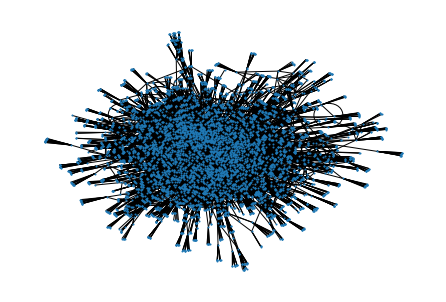

In [ ]:
nx.draw(g, node_size = 1)

**Part - D**

In [ ]:
!wget https://raw.githubusercontent.com/Ragzz258/my-datasets/main/Wiki.csv

--2022-03-27 21:39:33--  https://raw.githubusercontent.com/Ragzz258/my-datasets/main/Wiki.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37766 (37K) [text/plain]
Saving to: ‘Wiki.csv’

Wiki.csv            100%[===================>]  36.88K  --.-KB/s    in 0.001s  

2022-03-27 21:39:33 (64.0 MB/s) - ‘Wiki.csv’ saved [37766/37766]



In [ ]:
gd = pd.read_csv("Wiki.csv")
gd.head()

,Unnamed: 0,Article_Title,Label,All_Labels,Link
0,0,Absolute Value,1,1,https://en.wikipedia.org/wiki/Absolute_value
1,1,addition theorem,1,1,https://en.wikipedia.org/wiki/Addition_theorem
2,2,Adjoint of a matrix,2,2,https://en.wikipedia.org/wiki/Adjugate_matrix
3,3,Algebra of sets,2,2,https://en.wikipedia.org/wiki/Algebra_of_sets
4,4,Algorithm,2,2,https://en.wikipedia.org/wiki/Algorithm


In [ ]:
page_pattern = re.compile(r"([\w\d\s])+")

In [ ]:
gd.reset_index()
gd.columns

Index(['Unnamed: 0', 'Article_Title', 'Label', 'All_Labels', 'Link'], dtype='object')

In [ ]:
gd = gd[['Article_Title', 'Label']]

In [ ]:
fv = []
for index, row in gd.iterrows():
    try:
        fv.append(feature_vector(row['Article_Title'])[1][0])
    except:
        fv.append(nan)

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

In [ ]:
gd['feature_vector'] = fv

In [ ]:
gd.dropna(inplace=True)
gd.reset_index()

,index,Article_Title,Label,feature_vector
0,0,Absolute Value,1,"[0.021801611683155447, 0.5232386803957307, 0.0..."
1,1,addition theorem,1,"[0.28968272975116055, 0.3379631847096873, 0.04..."
2,2,Adjoint of a matrix,2,"[0.807184978062317, 0.03011884246501183, 0.030..."
3,3,Algebra of sets,2,"[0.06814662756363819, 0.034073313781819096, 0...."
4,4,Algorithm,2,"[0.050770018251899945, 0.5194163405771303, 0.4..."
...,...,...,...,...
407,457,Vector Space,1,"[0.029472616006957542, 0.12860777893945108, 0...."
408,458,Vieta Formula,1,"[0.0552532101512818, 0.1105064203025636, 0.036..."
409,459,Wald-Wolfowitz Run Test,1,"[0.041030496993110906, 0.041030496993110906, 0..."
410,461,Weighted Arithmetic Mean,1,"[0.02496491773433435, 0.0499298354686687, 0.06..."


In [ ]:
index_to_be_removed = []
for index, rows in gd.iterrows():
    if (type(rows["feature_vector"]) == nan) or (len(rows["feature_vector"]) < 100):
        index_to_be_removed.append(index)
gd = gd.drop(index_to_be_removed)

In [ ]:
fv_list = []
for index, row in gd.iterrows():
    fv_list.append(np.array(row["feature_vector"]))

Building Network

In [ ]:
x_train = np.array(fv_list)
y_list = gd["Label"].reset_index()

In [ ]:
y_list = np.array(gd["Label"])
y_list[y_list == ' '] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [ ]:
y_train = []

for i in range(len(y_list)):
    arr = np.zeros(4)
    arr[int(y_list[i])] = 1
    y_train.append(arr)

y_train = np.array(y_train)

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
x_train_1 = x_train[:320, :]
x_valid_1 = x_train[320:, :]
x_train_1.shape, x_valid_1.shape

((320, 100), (73, 100))

In [ ]:
y_train_1 = y_train[:320, :] 
y_valid_1 = y_train[320:, :]
y_train_1.shape, y_valid_1.shape

((320, 4), (73, 4))

In [ ]:
!pip install tensorflow
import tensorflow.keras as keras
num_categories = 4

     |████████████████████████████████| 462 kB 17.8 MB/s 


In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=40, activation='relu', input_shape=(100,)))
model.add(Dense(units = 15, activation='relu'))
model.add(Dense(units = 4, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                4040      
                                                                 
 dense_4 (Dense)             (None, 15)                615       
                                                                 
 dense_5 (Dense)             (None, 4)                 64        
                                                                 
Total params: 4,719
Trainable params: 4,719
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train_1, y_train_1, epochs=50, verbose=1, validation_data=(x_valid_1, y_valid_1)
)

Epoch 1/50
10/10 [==============================] - 0s 16ms/step - loss: 1.0821 - accuracy: 0.5813 - val_loss: 1.3182 - val_accuracy: 0.3973
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 1.0741 - accuracy: 0.5875 - val_loss: 1.3228 - val_accuracy: 0.3836
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 1.0638 - accuracy: 0.5875 - val_loss: 1.3206 - val_accuracy: 0.3425
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 1.0557 - accuracy: 0.5781 - val_loss: 1.3217 - val_accuracy: 0.3973
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 1.0469 - accuracy: 0.5969 - val_loss: 1.3268 - val_accuracy: 0.3425
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 1.0361 - accuracy: 0.5938 - val_loss: 1.3294 - val_accuracy: 0.3425
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 1.0282 - accuracy: 0.6000 - val_loss: 1.3303 - val_accuracy: 0.3699
Epoch 8/50
10/

In [ ]:
fv = feature_vector("Formal proof")[1]
np.argmax(model.predict(fv))

1

saving trained model for using it in traversal

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!rm -rf drive/MyDrive/saved_model
!mkdir -p saved_model
model.save('saved_model/my_model')
!mv saved_model/my_model drive/MyDrive

Mounted at /content/drive
INFO:tensorflow:Assets written to: saved_model/my_model/assets


**Part - E**

In [ ]:
import tensorflow
new_model = tensorflow.keras.models.load_model('drive/MyDrive/my_model')

In [ ]:
desc = {0:"Irrelevant", 1:"Easy", 2:"Intermediate", 3:"Advance"}
node_classification = {"node":[], "labels":[]}
nodes_labelled = {}

In [ ]:
for i in g.nodes:
    try:
        fv = g.nodes[i]["embedding"][1]
        print(fv)
        label = np.argmax(new_model.predict(fv)[0])
        node_classification["node"].append(i)
        node_classification["labels"].append(label)
        nodes_labelled[i] = label
    except:
        continue

Streaming output truncated to the last 5000 lines.
  0.02440154 0.02440154 0.04066923 0.03253538 0.16267691 0.03253538
  0.06507076 0.03253538 0.03253538 0.03253538 0.04880307 0.02440154
  0.05693692 0.03253538 0.06507076 0.03253538 0.02440154 0.08133846
  0.03253538 0.03253538 0.02440154 0.02440154 0.04066923 0.1789446
  0.03253538 0.06507076 0.05693692 0.08133846 0.02440154 0.04880307
  0.07320461 0.04066923 0.03253538 0.03253538 0.04066923 0.05693692
  0.02440154 0.04880307 0.03253538 0.04066923 0.04066923 0.39855843
  0.03253538 0.05693692 0.25214921 0.04066923 0.02440154 0.02440154
  0.04066923 0.04066923 0.02440154 0.05693692 0.03253538 0.04880307
  0.10573999 0.02440154 0.02440154 0.02440154 0.02440154 0.02440154
  0.03253538 0.10573999 0.03253538 0.02440154 0.02440154 0.03253538
  0.03253538 0.03253538 0.08133846 0.15454307 0.02440154 0.04066923
  0.05693692 0.21961383 0.07320461 0.03253538]]
[[0.03539962 0.09439898 0.03539962 0.02359974 0.03539962 0.02359974
  0.02359974 0.530

In [ ]:
node = input("Enter the node which you want to study=>")
topics = []
if node in g.nodes:
    for n in g.neighbors(node):
        try:
            topics.append((n, nodes_labelled[n]))
        except:
            continue
    temp = []
    for each_topic in topics:
        for nb in g.neighbors(each_topic[0]):
            try:
                temp.append((nb, nodes_labelled[nb]))
            except:
                continue
    topics.extend(temp)
    topics.sort(key = lambda x: x[1])
    print("Order in which you should study topics from easy to hard is:1 for easy 2 for intermediate and 3 for hard")
    for topic, lable in topics:
        print(topic, lable)
else:
    print("No such node exists in database")

Enter the node which you want to study=>Algebra
Order in which you should study topics from easy to hard is:1 for easy 2 for intermediate and 3 for hard
Algebra_over_a_field 1
Quadratic_formula 1
Formula 1
Quadratic_function 1
Quadratic_equation 1
Mathematical_analysis 1
Abstract_algebra 1
Quadratic_polynomial 1
Monic_polynomial 1
Finitely_generated_group 1
Algebraic_fraction 1
Racks_and_quandles 1
Quasigroup 1
Group_theory 1
Quadratic_function 1
Quadratic_equation 1
Completing_the_square 1
Graph_of_a_function 1
Discriminant 1
Zero_of_a_function 1
Quadratic_polynomial 1
Arab_League 1
Arabs 1
Language_shift 1
Varieties_of_Arabic 1
L2_speakers 1
Language_family 1
Afroasiatic_languages 1
Semitic_languages 1
West_Semitic_languages 1
Algeria 1
Bahrain 1
Djibouti 1
Abjad 1
League_of_Arab_States 1
Talaat_Harb_Street 1
Cairo_Citadel 1
Lebanon 1
Emirate_of_Transjordan 1
Jordan 1
Yemen 1
Emblem_of_Algeria 1
Kassaman 1
Bahrainona 1
Seal_of_Comoros 1
Flag_of_Djibouti 1
Flag_of_Iraq 1
Kuwait 1
Liby

the above output is an example where the node entered is Algebra and it tell the order in which you should read Algebra